In [1]:
# Imports

import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

from matplotlib import pyplot as plt

In [2]:
# Function to read data

def read_data():
  tshirt = cv.imread('/content/sample_data/tshirt.jpg')
  ladies_dress1 = cv.imread('/content/sample_data/ladies_dress1.jpg')
  ladies_dress2 = cv.imread('/content/sample_data/ladies_dress2.jpg')
  return (tshirt, ladies_dress1, ladies_dress2)

**Feature Extraction - Getting shape of an image**

In [3]:
# Read data
tshirt, ladies_dress1, ladies_dress2 = read_data()

print("Shape of tshirt image:", tshirt.shape)

Shape of tshirt image: (1000, 927, 3)


**Feature Extraction - extract all pixels of an image**

In [4]:
# Function to extarct features of an image

def get_pixel_features(img):
  if len(img.shape) == 2:
    return np.reshape(img, (img.shape[0]*img.shape[1]))
  else:
    return np.reshape(img, (img.shape[0]*img.shape[1]*img.shape[2]))

In [5]:
# Pixel features of tshirt image
print("tshirt image features:", get_pixel_features(tshirt))

tshirt image features: [255 255 255 ... 255 255 255]


**Feature Extraction - Detecting Corners and Edges**

Simple Harris Corner Detector

In [6]:
# Read data
tshirt, ladies_dress1, ladies_dress2 = read_data()

In [7]:
def detect_corner_and_edges_using_HarrisCD(img):
    # Convert image to gray scale and float32 type.
    # Harris Corner Detector works on Grayscale and float32 type images

    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    gray = np.float32(gray)

    # Apply Harris Corner Detection
    dst = cv.cornerHarris(gray, 2, 3, 0.04)

    # result is dilated for marking the corners
    dst = cv.dilate(dst, None)

    # Threshold for an optimal value, it may vary depending on the image
    img[dst > 0.01*dst.max()]=[0, 0, 255]
    cv2_imshow(img)

    if cv.waitKey(0) & 0xff == 27:
        cv.destroyAllWindows()

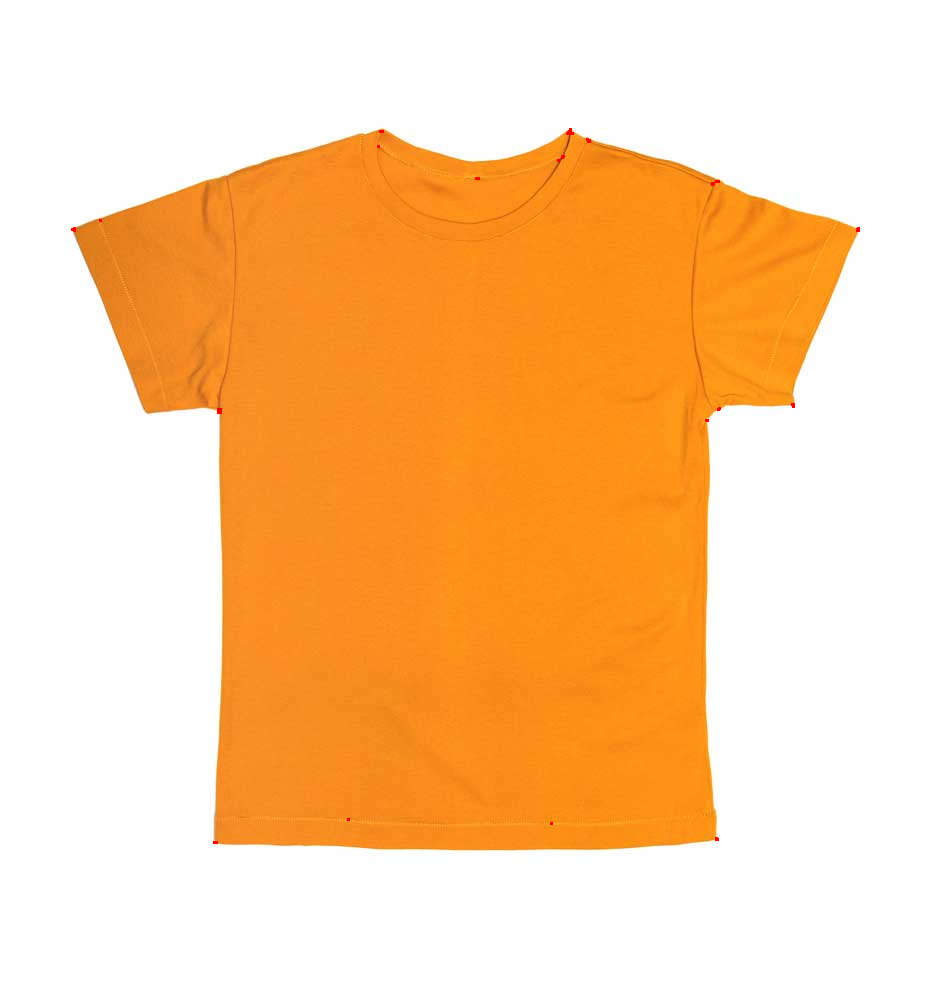

In [8]:
# Apply function on tshirt image
detect_corner_and_edges_using_HarrisCD(tshirt)

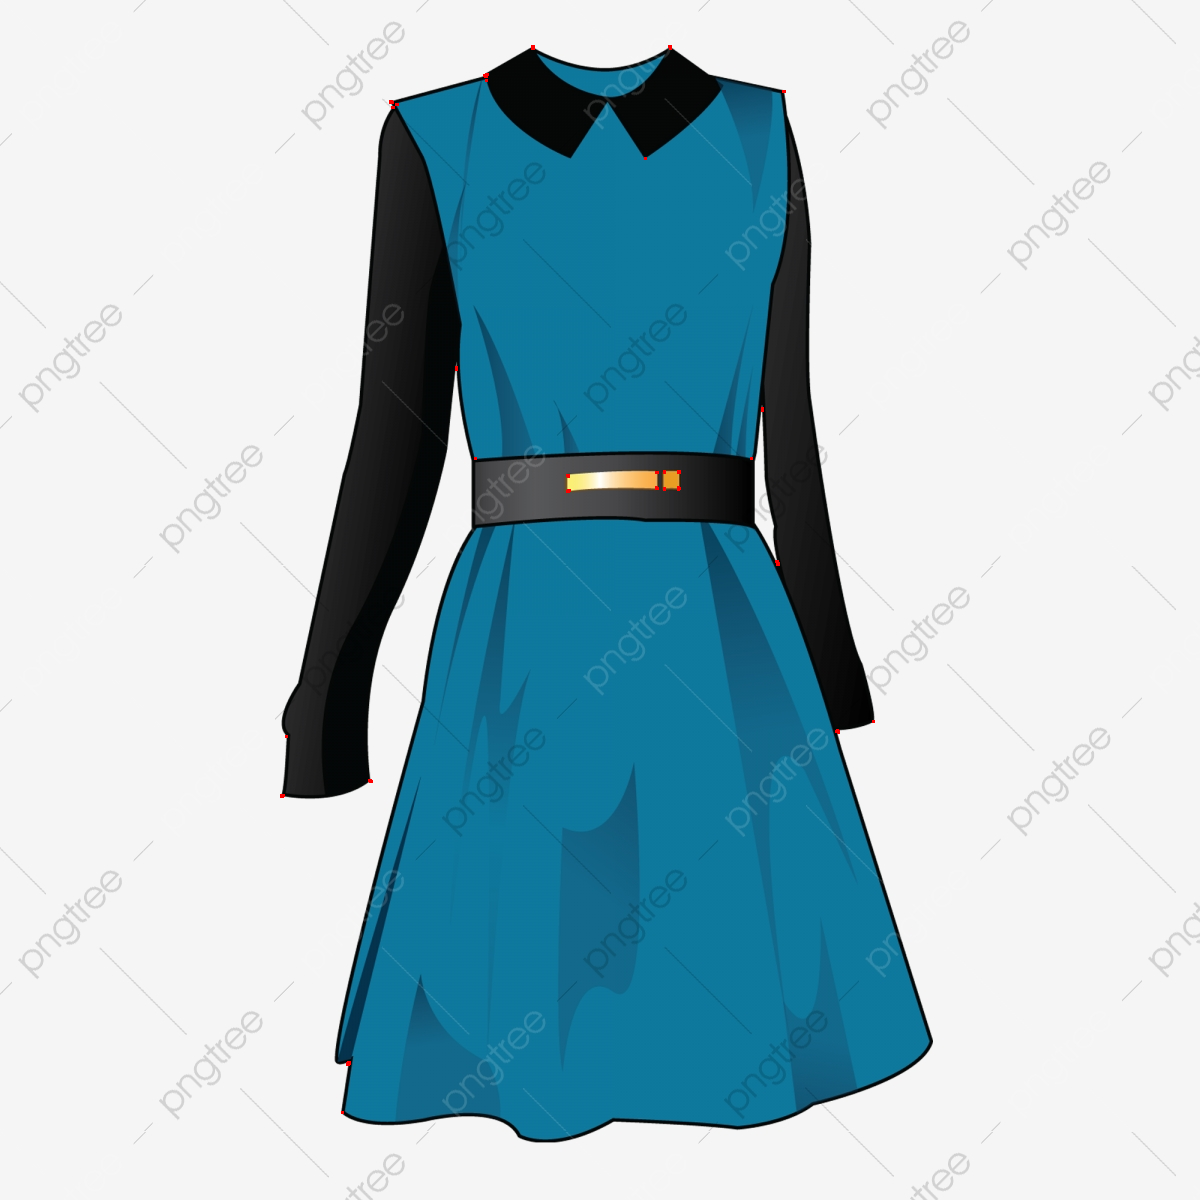

In [9]:
# Apply function on ladies dress1
detect_corner_and_edges_using_HarrisCD(ladies_dress1)

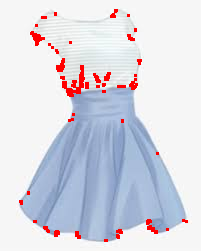

In [10]:
# Apply function on ladies dress2
detect_corner_and_edges_using_HarrisCD(ladies_dress2)

FAST Algorithm for Corner Detection

In [11]:
# Read data
tshirt, ladies_dress1, ladies_dress2 = read_data()

In [12]:
def detect_corner_and_edges_using_FAST(img):
  # Initiate FAST object with default values
  fast = cv.FastFeatureDetector_create()

  # find and draw the keypoints
  kp = fast.detect(img,None)
  img2 = cv.drawKeypoints(img, kp, None, color=(255,0,0))
  
  cv2_imshow(img2)

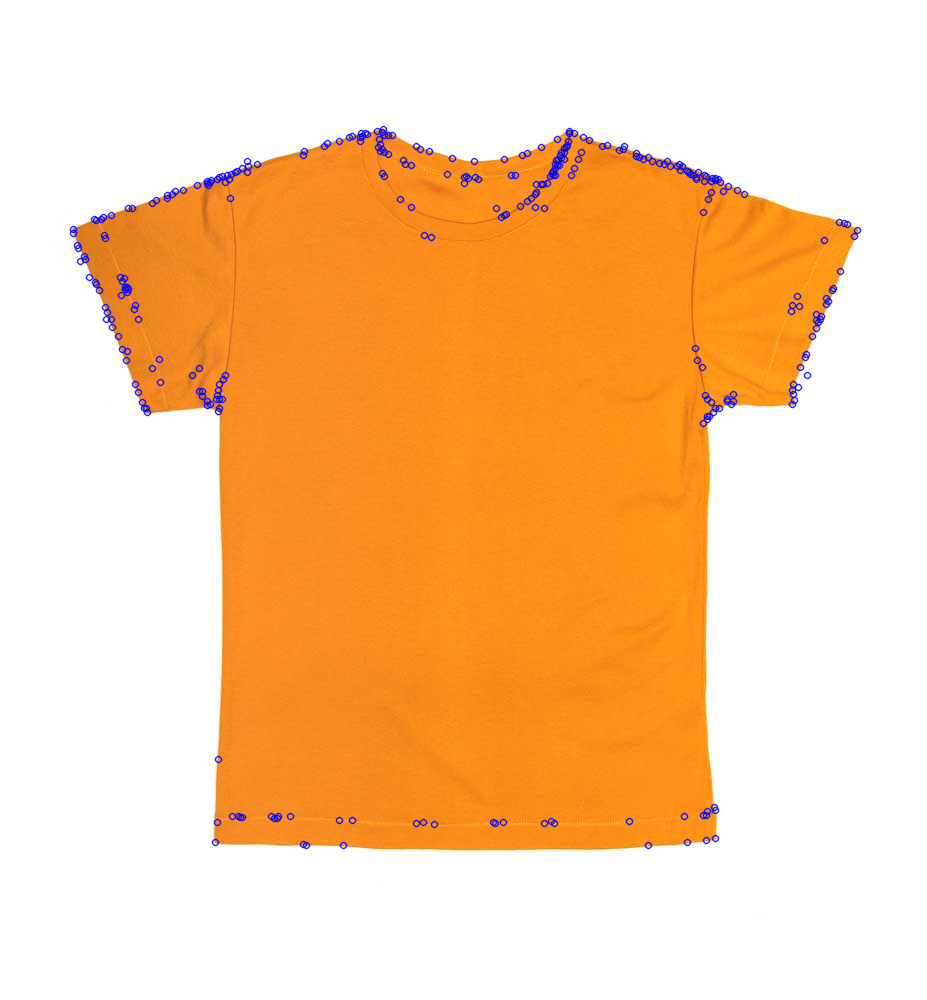

In [13]:
# Apply function on tshirts
detect_corner_and_edges_using_FAST(tshirt)

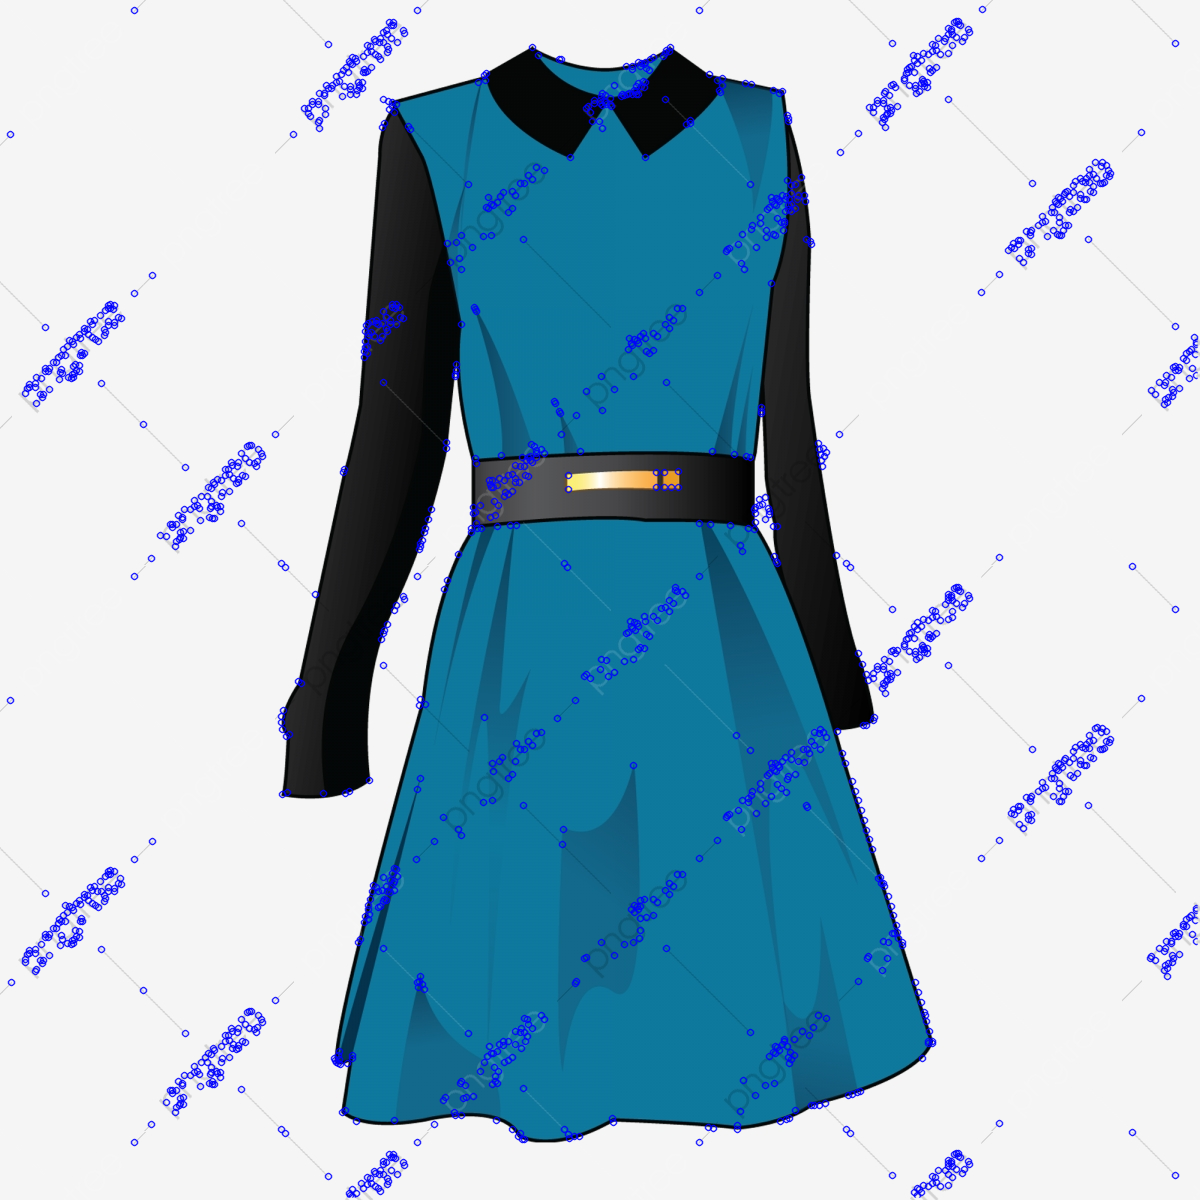

In [14]:
# Apply function on ladies dress 1
detect_corner_and_edges_using_FAST(ladies_dress1)

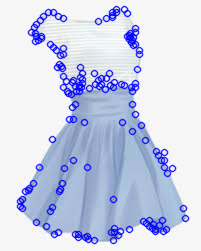

In [15]:
# Apply function on ladies dress 2
detect_corner_and_edges_using_FAST(ladies_dress2)

**Feature Extraction - Intensity of gray scale in each image**

Pixel Histogram - Used to get intensity of grayscale in an image

In [16]:
# Read data
tshirt, ladies_dress1, ladies_dress2 = read_data()

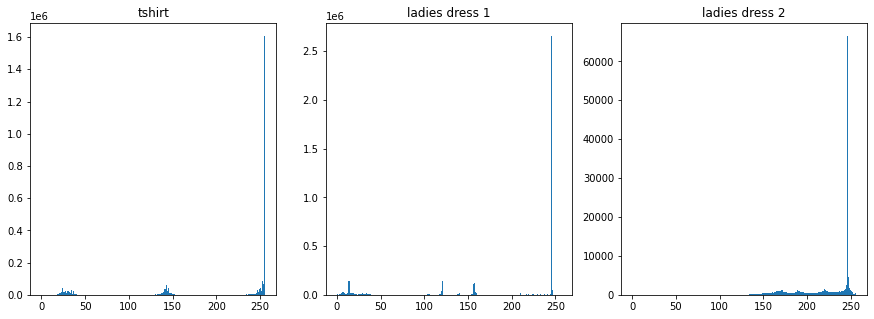

In [17]:
# Get subplot axes for plots
fig, axs = plt.subplots(1, 3, figsize=(15, 5));

# Plot histograms
axs[0].hist(tshirt.ravel(),256,[0,256]);
axs[0].title.set_text('tshirt')
axs[1].hist(ladies_dress1.ravel(),256,[0,256]);
axs[1].title.set_text('ladies dress 1')
axs[2].hist(ladies_dress2.ravel(),256,[0,256]);
axs[2].title.set_text('ladies dress 2')

**Feature extraction using clustering - Complete object detection**

In [18]:
from sklearn.feature_extraction import image
from sklearn.feature_extraction.image import grid_to_graph
import time as time
from sklearn.cluster import AgglomerativeClustering

In [19]:
# Read data
tshirt, ladies_dress1, ladies_dress2 = read_data()

In [20]:
def object_detection_using_clustering(img, n_clusters):
  """
  Input parameters:
    1. img = input image
    2. n_clusters = number of clusters, Need domain knowledge
                    Currently passing by observing image
  Output: prints output image
  """
  # Convert image to gray scale
  gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  reshaped_image = np.reshape(gray, (-1, 1))
  
  # Get connected pixels of image
  connectivity = grid_to_graph(*gray.shape)

  # Clustering to detect edges
  cluster_model = AgglomerativeClustering(n_clusters=n_clusters,
                                 linkage="ward",
                                 connectivity=connectivity
                                 )
  # Fit on image data
  cluster_model.fit(reshaped_image)
  label = np.reshape(cluster_model.labels_, gray.shape)

  plt.figure(figsize=(5, 5))
  plt.imshow(gray, cmap=plt.cm.gray)
  for l in range(n_clusters):
    plt.contour( label == l,
        colors=[ plt.cm.nipy_spectral(l / float(n_clusters)),],
    )
  plt.axis("off")
  plt.show()

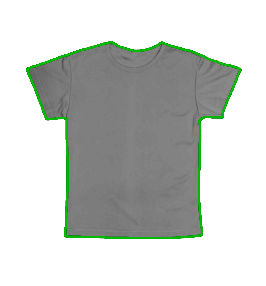

In [21]:
object_detection_using_clustering(tshirt, 2)

In [22]:
# Below code crashes due to insufficient compute resources
#object_detection_using_clustering(ladies_dress1, 9)

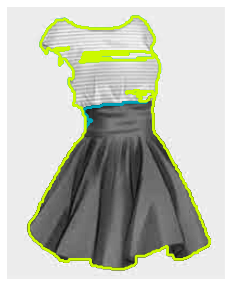

In [23]:
object_detection_using_clustering(ladies_dress2, 3)

**Feature Extraction - Colour**

Colour is an important feature as different images are coloured differently.

In [24]:
# Read data
tshirt, ladies_dress1, ladies_dress2 = read_data()

Getting dominent colour by using HSV (Hue-Saturation-Value)

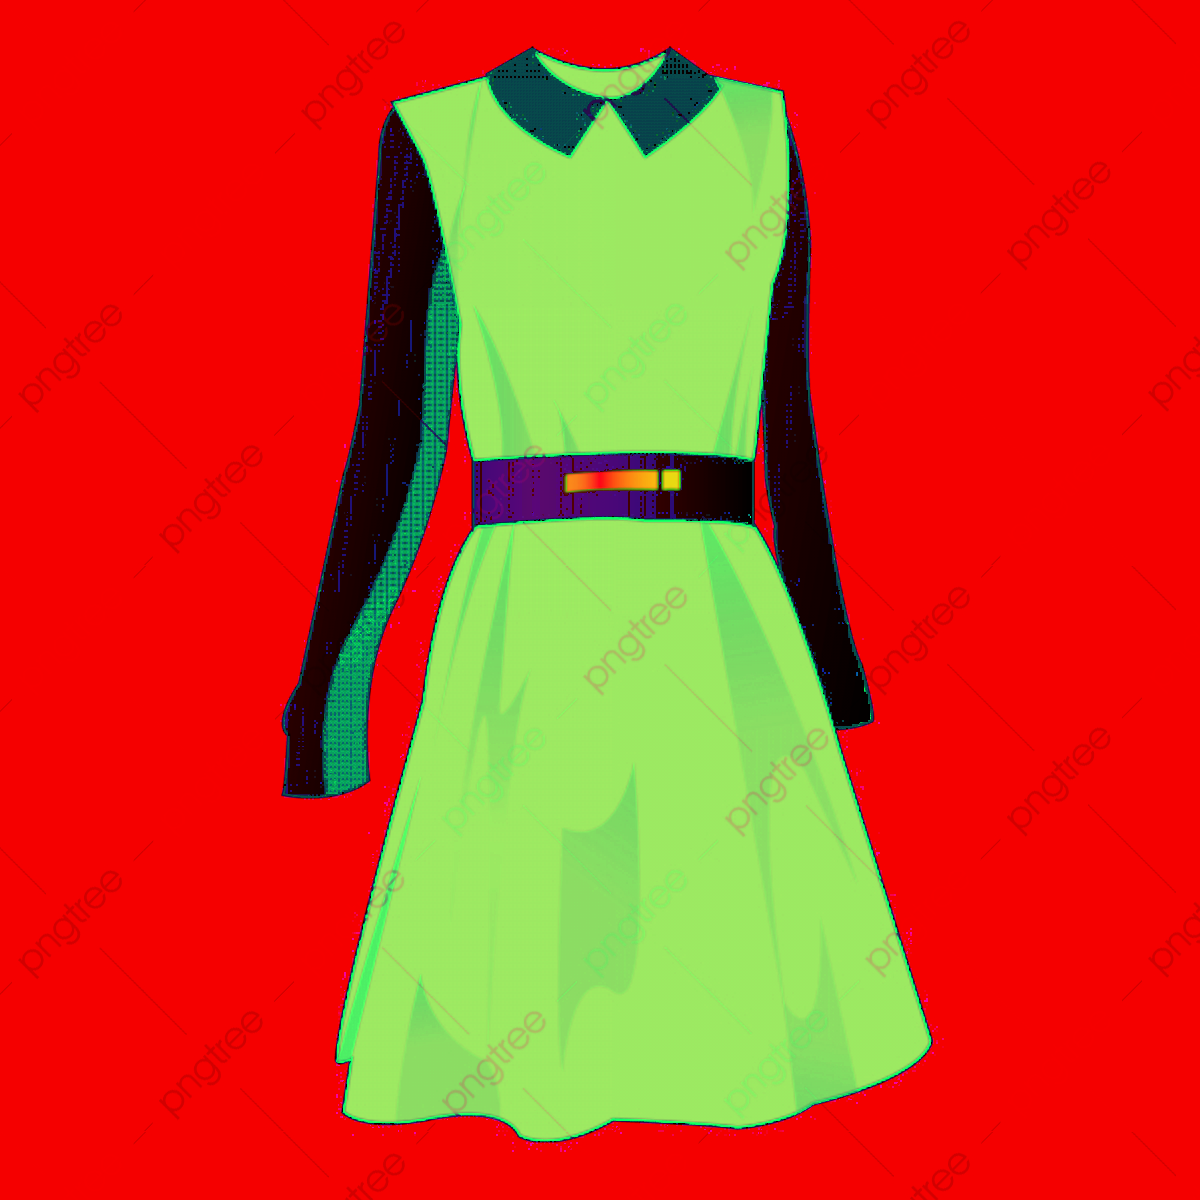

In [25]:
# Getting dominent colour by using HSV (Hue-Saturation-Value)

hsv_image = cv.cvtColor(ladies_dress1, cv.COLOR_BGR2HSV)
cv2_imshow(hsv_image)

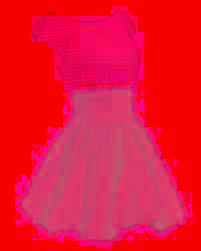

In [26]:
hsv_image = cv.cvtColor(ladies_dress2, cv.COLOR_BGR2HSV)
cv2_imshow(hsv_image)

Lightness of colour using LAB

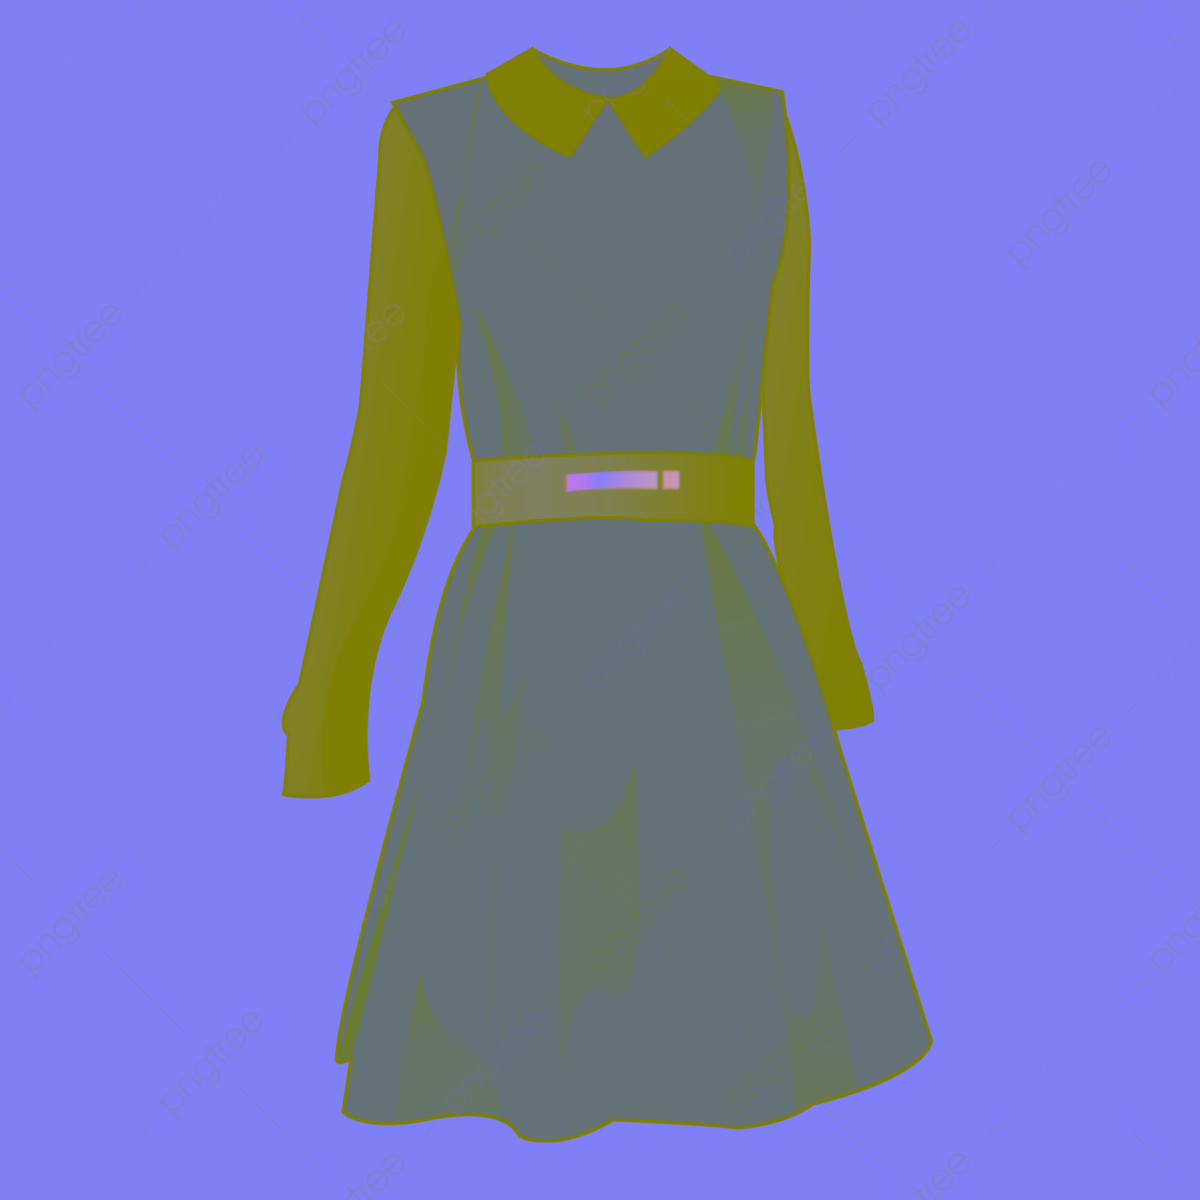

In [27]:
lab_image = cv.cvtColor(ladies_dress1, cv.COLOR_BGR2LAB)
cv2_imshow(lab_image)

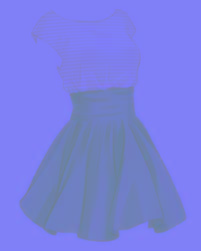

In [28]:
lab_image = cv.cvtColor(ladies_dress2, cv.COLOR_BGR2LAB)
cv2_imshow(lab_image)

Image masking to identify spots

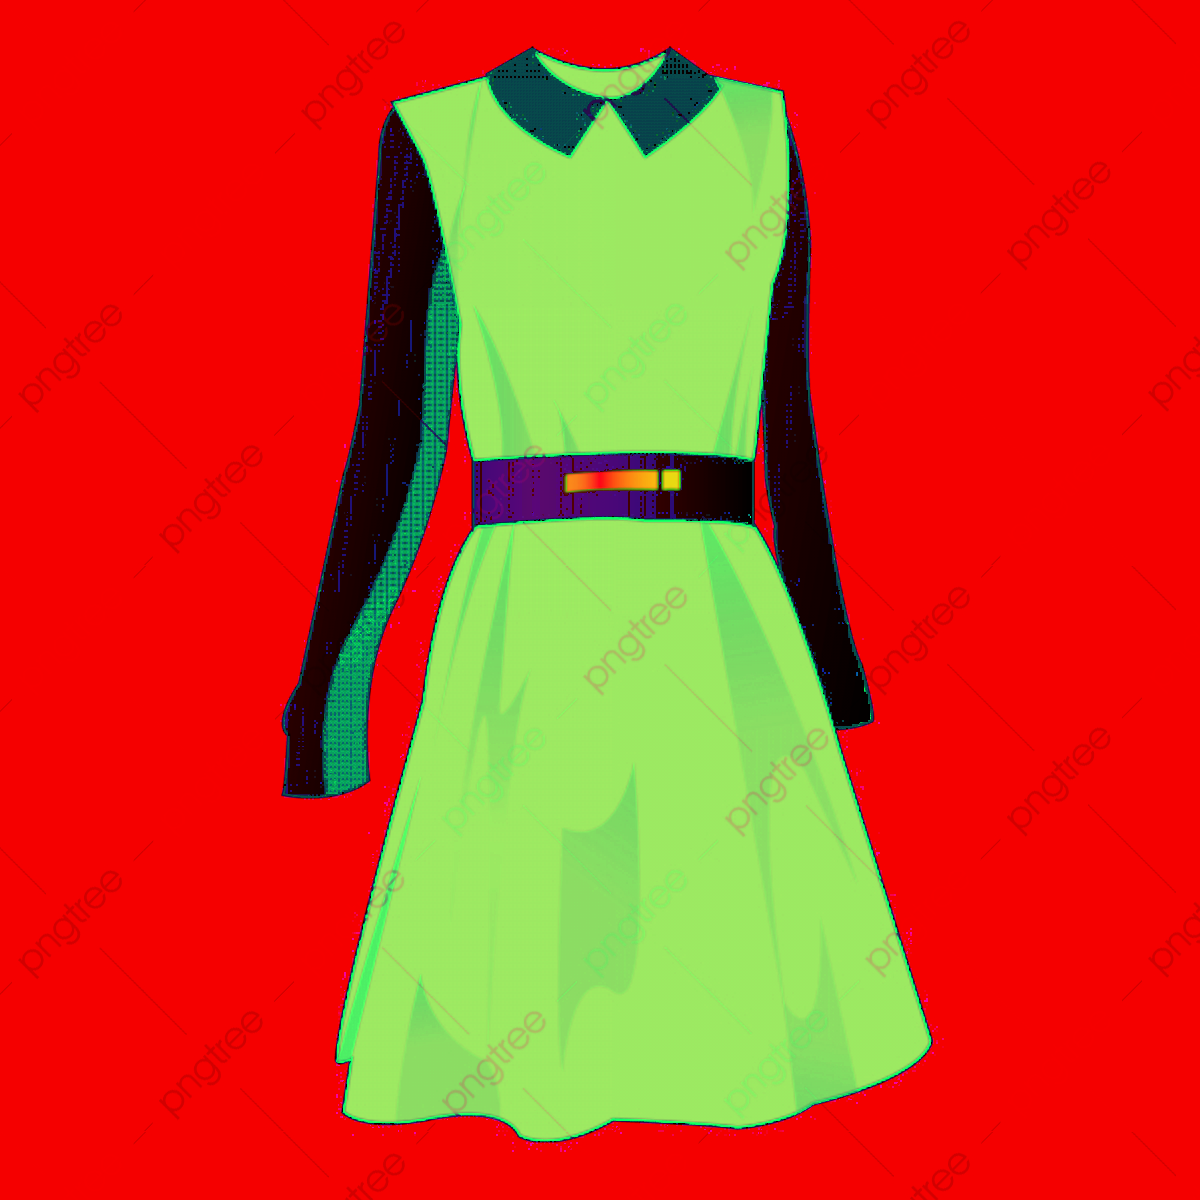

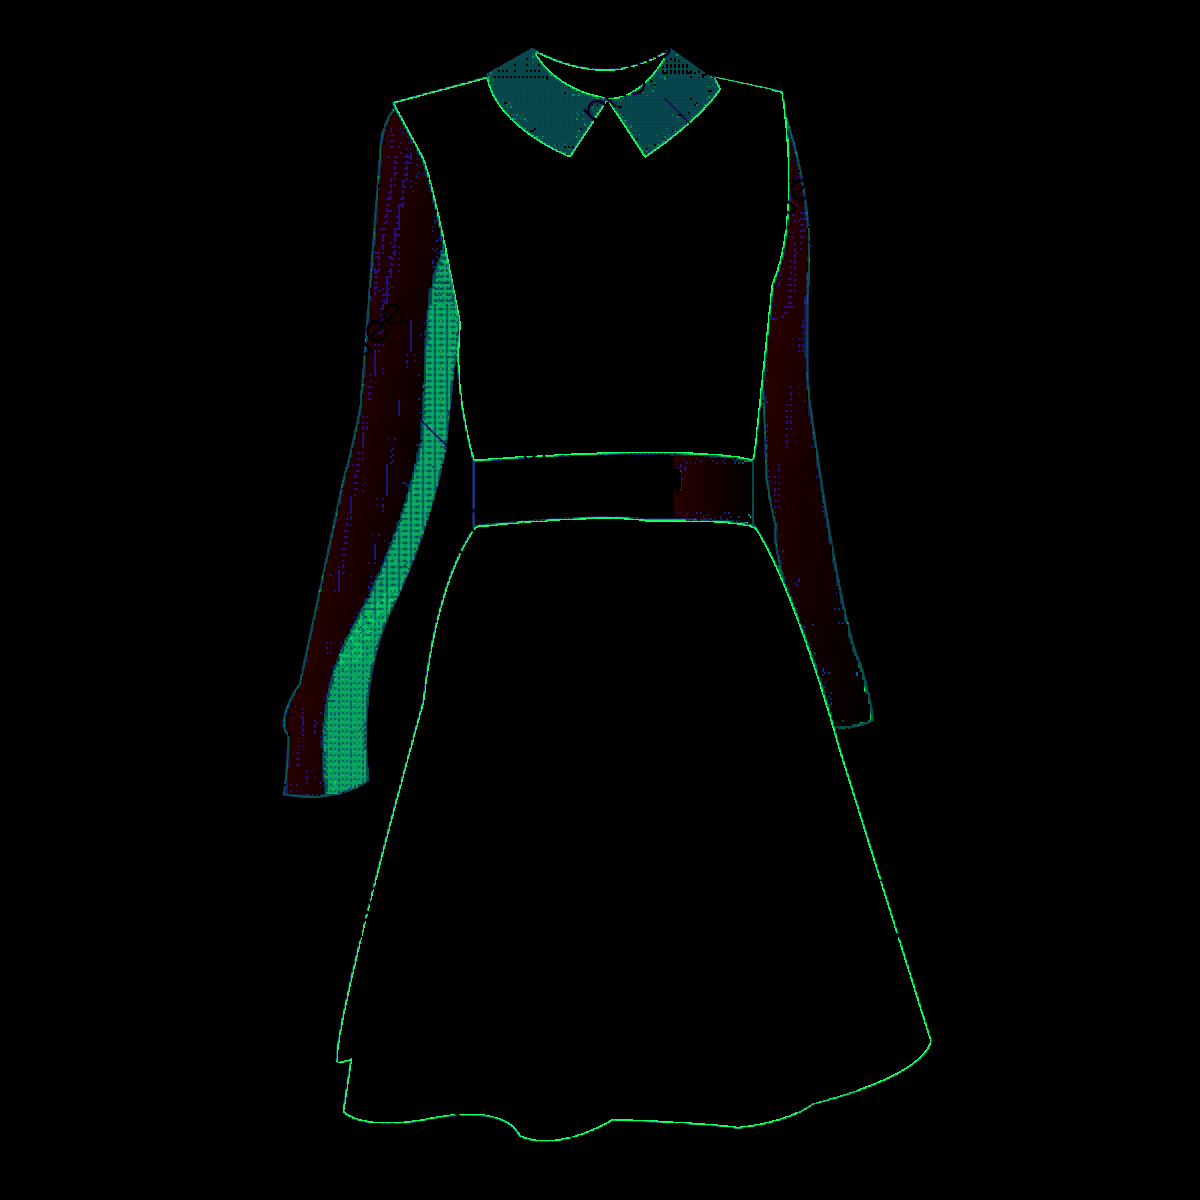

In [29]:
# Converting image to HSV color space
hsv_image_spot = cv.cvtColor(ladies_dress1, cv.COLOR_BGR2HSV)
cv2_imshow(hsv_image_spot)

# Setting the black pixel mask and perform bitwise_and to get only the black pixels
mask = cv.inRange(hsv_image_spot, (0, 0, 0), (180, 255, 40))
masked = cv.bitwise_and(hsv_image_spot, hsv_image_spot, mask=mask)
cv2_imshow(masked)

**Feature Extraction - Moment**

Moment helps to extract useful data like area, centroid

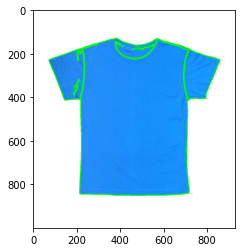

{'m00': 388528.5, 'm10': 180158490.0, 'm01': 184084990.5, 'm20': 94666946361.25, 'm11': 85371407883.375, 'm02': 103016705281.41666, 'm30': 54222421231743.305, 'm21': 44247591411624.63, 'm12': 47780700028730.6, 'm03': 64466888965963.16, 'mu20': 11128463292.234222, 'mu11': 12228517.783172607, 'mu02': 15797148087.066452, 'mu30': 5476027331.046875, 'mu21': -616993977020.54, 'mu12': 842845962.9638672, 'mu03': 688131618328.8672, 'nu20': 0.07372069736170937, 'nu11': 8.100802734413829e-05, 'nu02': 0.10464848045258944, 'nu30': 5.819804600947799e-05, 'nu21': -0.006557279884019049, 'nu12': 8.957586433758075e-06, 'nu03': 0.007313315504658709}


In [30]:
ret, thresh = cv.threshold(tshirt, 127,255,0)
im_bw = cv.cvtColor(tshirt, cv.COLOR_RGB2GRAY)

blur = cv.GaussianBlur(im_bw, (5,5), 0)
im_bw = cv.Canny(blur, 10, 90)

contours, hierarchy = cv.findContours(im_bw, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(tshirt, contours, -1, (0,255,0), 3)
plt.imshow(tshirt)
plt.show()

cnt = contours[0]
M = cv.moments(cnt)
print( M )

In [31]:
# Centroids - Features of an image

cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
print('cx:', cx, 'cy:', cy)

cx: 463 cy: 473


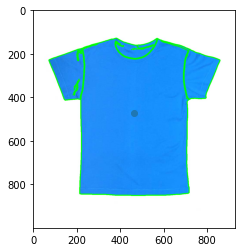

In [32]:
plt.imshow(tshirt)
plt.scatter(cx, cy) # Plots centroid
plt.show()

In [33]:
# Area feature of an image

area = cv.contourArea(cnt)
print("Area of image", round(area,2))

Area of image 388528.5


In [34]:
# Contour perimeter

perimeter = cv.arcLength(cnt,True)
print("Perimeter of image:", round(perimeter, 2))

Perimeter of image: 2855.07


**Minimum Enclosing Circle**

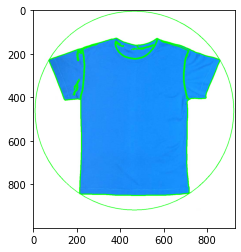

In [35]:
# Get circle coordinates and plot with image

(x,y),radius = cv.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
cv.circle(tshirt,center,radius,(0,255,0),2)
plt.imshow(tshirt)
plt.show()

**Extract Texture Features**

In [36]:
# Read data
tshirt, ladies_dress1, ladies_dress2 = read_data()

In [37]:
def get_texture_features(img):
  gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

  # Find the GLCM
  import skimage.feature as feature

  # Param:
  # source image
  # List of pixel pair distance offsets - here 1 in each direction
  # List of pixel pair angles in radians
  graycom = feature.greycomatrix(gray, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4],
                                levels=256)

  # Find the GLCM properties
  contrast = feature.greycoprops(graycom, 'contrast')
  dissimilarity = feature.greycoprops(graycom, 'dissimilarity')
  homogeneity = feature.greycoprops(graycom, 'homogeneity')
  energy = feature.greycoprops(graycom, 'energy')
  correlation = feature.greycoprops(graycom, 'correlation')
  ASM = feature.greycoprops(graycom, 'ASM')

  print("Contrast: {}".format(contrast))
  print("Dissimilarity: {}".format(dissimilarity))
  print("Homogeneity: {}".format(homogeneity))
  print("Energy: {}".format(energy))
  print("Correlation: {}".format(correlation))
  print("ASM: {}".format(ASM))

In [38]:
# Get texture features for tshirt

get_texture_features(tshirt)

Contrast: [[ 8.21133261 16.47058073  9.28197669 16.20693912]]
Dissimilarity: [[0.48460259 0.79152154 0.51608027 0.7781691 ]]
Homogeneity: [[0.89974181 0.84638067 0.88707371 0.8481065 ]]
Energy: [[0.56500118 0.55999881 0.56450316 0.56005801]]
Correlation: [[0.99807658 0.99614299 0.99782575 0.99620473]]
ASM: [[0.31922634 0.31359867 0.31866382 0.31366498]]


In [39]:
# Get texture features for ladies_dress1
get_texture_features(ladies_dress1)

Contrast: [[ 79.05363358 115.87675579  38.46346956 103.03838409]]
Dissimilarity: [[1.33756603 1.67538142 0.99816931 1.66076262]]
Homogeneity: [[0.86442701 0.84819747 0.85792528 0.84802052]]
Energy: [[0.61306037 0.61144777 0.61361954 0.61056341]]
Correlation: [[0.99428713 0.9916294  0.9972204  0.99255681]]
ASM: [[0.37584302 0.37386838 0.37652894 0.37278768]]


In [40]:
# Get texture features for ladies_dress2
get_texture_features(ladies_dress2)

Contrast: [[29.03390438 56.05894    30.17321393 52.58776   ]]
Dissimilarity: [[2.19191235 3.4879     2.34431841 3.33032   ]]
Homogeneity: [[0.66374663 0.58189757 0.67018406 0.58539917]]
Energy: [[0.4479589  0.44099577 0.44815928 0.44057037]]
Correlation: [[0.9861687  0.97333728 0.98562016 0.97498819]]
ASM: [[0.20066717 0.19447727 0.20084674 0.19410225]]
